## <font color='darkblue'>Introduction</font>
([Article source](https://blog.paperspace.com/anomaly-detection-isolation-forest/)) From bank fraud to preventative machine maintenance, anomaly detection is an incredibly useful and common application of machine learning. The isolation forest algorithm is a simple yet powerful choice to accomplish this task.

In this article we'll cover:
* [**An Introduction to Anomaly Detection**](#sect1)
* [**Use Cases of Anomaly Detection**](#sect2)
* [**What Is Isolation Forest?**](#sect3)
* [**Using Isolation Forest for Anomaly Detection**](#sect4)
* [**Supplement**](#sect5)

You can run the code for this tutorial for free on the [ML Showcase](https://ml-showcase.paperspace.com/projects/ensemble-methods-scikit-learn). So, let's get started!

<a id='sect1'></a>
## <font color='darkblue'>Introduction to Anomaly Detection</font>
An <b>outlier</b> is nothing but a data point that differs significantly from other data points in the given dataset. <b><font color='darkblue'>Anomaly detection</font> is the process of finding the outliers in the data, i.e. points that are significantly different from the majority of the other data points.</b>

By and large, <b><font color='darkred'>real-world datasets may have very complicated patterns that are difficult to detect by just looking at the data.</font></b> That's why the study of anomaly detection is an extremely important application of Machine Learning.

<b>In this article we are going to implement anomaly detection using the [isolation forest algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html). We have a simple dataset of salaries, where a few of the salaries are anomalous</b>. Our goal is to find those salaries. You could imagine this being a situation where certain employees in a company are making an unusually large sum of money, which might be an indicator of unethical activity.

Before we proceed with the implementation, let's discuss some of the use cases of anomaly detection.

<a id='sect2'></a>
## <font color='darkblue'>Anomaly Detection Use Cases</font>
Anomaly detection has wide applications across industries. Below are some of the popular use cases:

<b><font size='3ptx'>Banking.</font></b> Finding abnormally high deposits. Every account holder generally has certain patterns of depositing money into their account. If there is an outlier to this pattern the bank needs to be able to detect and analyze it, e.g. for money laundering.

<b><font size='3ptx'>Finance.</font></b> Finding the pattern of fraudulent purchases. Every person generally has certain patterns of purchases which they make. If there is an outlier to this pattern the bank needs to detect it in order to analyze it for potential fraud.

<b><font size='3ptx'>Healthcare.</font></b> Detecting fraudulent insurance claims and payments.

<b><font size='3ptx'>Manufacturing.</font></b> Abnormal machine behavior can be monitored for cost control. Many companies continuously monitor the input and output parameters of the machines they own. It is a well-known fact that before failure a machine shows abnormal behaviors in terms of these input or output parameters. A machine needs to be constantly monitored for anomalous behavior from the perspective of preventive maintenance.

<b><font size='3ptx'>Networking.</font></b> Detecting intrusion into networks. Any network exposed to the outside world faces this threat. Intrusions can be detected early on using monitoring for anomalous activity in the network.

Now let's understand what the isolation forest algorithm in machine learning is

<a id='sect3'></a>
## <font color='darkblue'>What Is Isolation Forest?</font>
<b>[Isolation forest](https://en.wikipedia.org/wiki/Isolation_forest) is a machine learning algorithm for anomaly detection</b>. It's an unsupervised learning algorithm that identifies anomaly by isolating outliers in the data. Isolation Forest is based on the [Decision Tree algorithm](https://en.wikipedia.org/wiki/Decision_tree). It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data.

In general the first step to anomaly detection is to construct a profile of what's "normal", and then report anything that cannot be considered normal as anomalous. However, <b>the isolation forest algorithm does not work on this principle; it does not first define "normal" behavior, and it does not calculate point-based distances</b>.

As you might expect from the name, <b>Isolation Forest instead works by isolating anomalies explicitly isolating anomalous points in the dataset.</b>

<font color='darkred'><b>The Isolation Forest algorithm is based on the principle that anomalies are observations that are few and different, which should make them easier to identify</b></font>. Isolation Forest uses an ensemble of Isolation Trees for the given data points to isolate anomalies.

Isolation Forest recursively generates partitions on the dataset by randomly selecting a feature and then randomly selecting a split value for the feature. <b>Presumably the anomalies need fewer random partitions to be isolated compared to "normal" points in the dataset, so the anomalies will be the points which have a smaller path length in the tree, path length being the number of edges traversed from the root node</b>.
> <font size='3ptx'>Using Isolation Forest, we can not only detect anomalies faster but we also require less memory compared to other algorithms.</font>

Isolation Forest isolates anomalies in the data points instead of profiling normal data points. <b>As anomalies data points mostly have a lot shorter tree paths than the normal data points, trees in the isolation forest does not need to have a large depth so a smaller `max_depth` can be used resulting in low memory requirement.</b>

This algorithm works very well with a small data set as well. Let's do some exploratory data analysis now to get some idea about the given data.

### <font color='darkgreen'>Exploratory Data Analysis</font>
Let's import the required libraries first. We are importing `numpy`, `pandas`, `seaborn` and `matplotlib`. Apart form that we also need to import [**IsolationForest**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) from [**sklearn.ensemble**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble).

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Once the libraries are imported we need to read the data from the csv to the pandas data frame and check the first 10 rows of data.

In [2]:
# No data found, generate data by ourselves
# Normal data
mean1, sigma1, mean2, sigma2 = 300, 20, 500, 10
X_normal1 = sigma1 * np.random.randn(1000, 1) + mean1
X_normal2 = sigma2 * np.random.randn(1000, 1) + mean2
X_normal = np.r_[X_normal1, X_normal2]   

# Anomaly data
X_outliers1 = np.random.uniform(low=0, high=100, size=(10, 1))
X_outliers2 = np.random.uniform(low=350, high=450, size=(10, 1))
X_outliers3 = np.random.uniform(low=550, high=800, size=(10, 1))
X = np.concatenate((X_normal, X_outliers1, X_outliers2, X_outliers3), axis=0)
X.shape

(2030, 1)

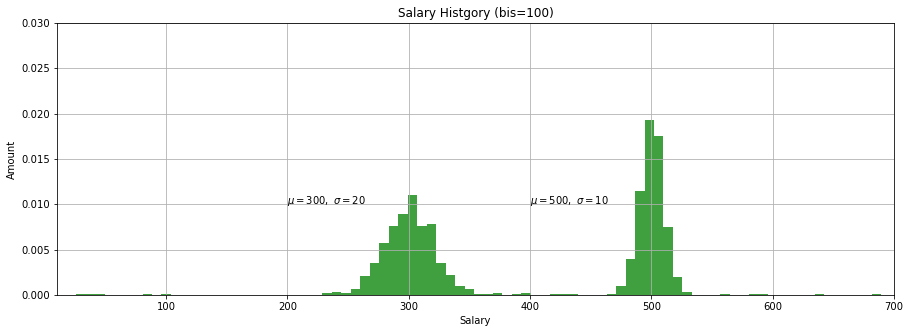

In [3]:
# the histogram of the data
plt.rcParams["figure.figsize"] = (15,5)
bins = 100
plt.hist(X, bins, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Salary')
plt.ylabel('Amount')
plt.title(f'Salary Histgory (bis={bins})')
plt.text(400, .01, r'$\mu={},\ \sigma={}$'.format(mean2, sigma2))
plt.text(200, .01, r'$\mu={},\ \sigma={}$'.format(mean1, sigma1))
plt.xlim(10, 700)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [4]:
from sklearn.utils import shuffle

df = pd.DataFrame({"salary":X.reshape(X.shape[0], ).tolist()})
# df = df.reindex(np.random.permutation(df.index))
df = shuffle(df)
df.head(10)

,salary
1036,498.836376
280,294.903850
845,327.743916
1347,490.204148
857,287.273226
289,329.073701
367,329.495503
1490,495.898474
1323,503.454481
1714,506.299047


To get more of an idea of the data we have plotted a violin plot of salary data as shown below. A [**violin plot**](https://seaborn.pydata.org/generated/seaborn.violinplot.html) is a method of plotting numeric data.

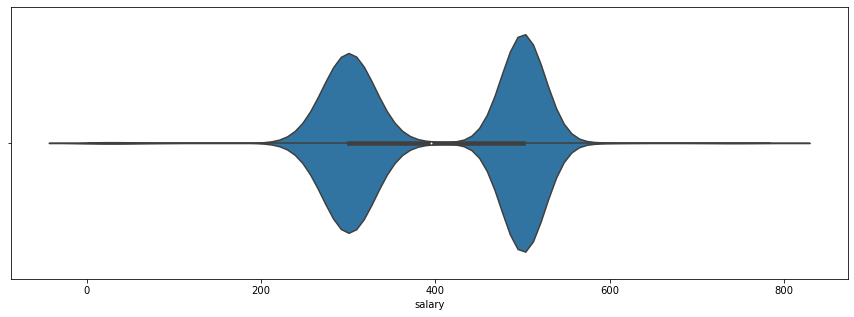

In [5]:
ax = sns.violinplot(x=df["salary"])

Typically a violin plot includes all the data that is in a [**box plot**](https://en.wikipedia.org/wiki/Box_plot), a marker for the median of the data, a box or marker indicating the interquartile range, and possibly all sample points, if the number of samples is not too high.

To get a better idea of outliers we may like to look at a box plot as well. This is also known as box-and-whisker plot. The box in box plot shows the quartiles of the dataset, while the whiskers shows the rest of the distribution.

Whiskers do not show the points that are determined to be outliers. <b>Outliers are detected by a method which is a function of the interquartile range</b>. In statistics the interquartile range, also known as mid spread or middle 50%, is a measure of statistical dispersion, which is equal to the difference between 75th and 25th percentiles.

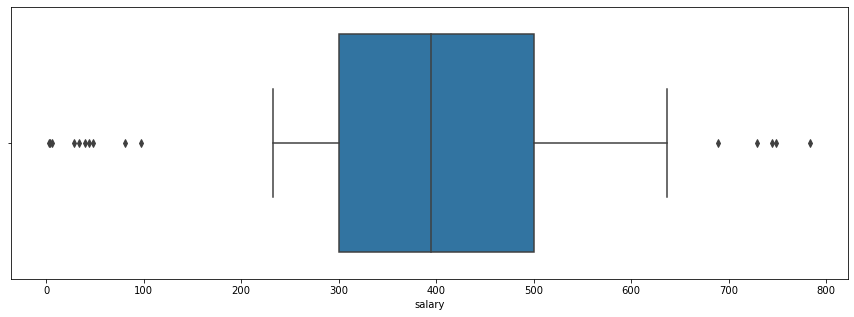

In [6]:
sns.boxplot(x=df["salary"], whis=0.75)

Once we have completed our exploratory data analysis, it's time to define and fit the model.

<a id='sect4'></a>
## <font color='darkblue'>Using Isolation Forest for Anomaly Detection</font>

### <font color='darkgreen'>Define and Fit Model</font>
We'll create a `model` variable and instantiate the [**IsolationForest**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) class. We are passing the values of four parameters to the Isolation Forest method, listed below:

| Parameter name  | Description |
| --------------- | :- |
| **Number of estimators** | `n_estimators` refers to the number of base estimators or trees in the ensemble, i.e. the number of trees that will get built in the forest. This is an integer parameter and is optional. The default value is 100. |
| **Max samples** | `max_samples` is the number of samples to be drawn to train each base estimator. If `max_samples` is more than the number of samples provided, all samples will be used for all trees. The default value of `max_samples` is 'auto'. If 'auto', then <font color='blue'>max_samples=min(256, n_samples)</font> |
| **Contamination** | This is a parameter that the algorithm is quite sensitive to; it refers to the expected proportion of outliers in the data set. This is used when fitting to define the threshold on the scores of the samples. The default value is 'auto'. If ‘auto’, the threshold value will be determined as in the original paper of Isolation Forest. |
| **Max features** | All the base estimators are not trained with all the features available in the dataset. It is the number of features to draw from the total features to train each base estimator or tree.The default value of max features is one. |

In [7]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df[['salary']])

IsolationForest(contamination=0.1, n_estimators=50)

After we defined the model above we need to train the model using the data given. For this we are using the <font color='blue'>fit()</font> method as shown above. This method is passed one parameter, which is our data of interest (<font color='brown'>in this case, the salary column of the dataset</font>).

Once the model is trained properly it will output the [**IsolationForest**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) instance as shown in the output of the cell above.

Now this is the time to add the scores and anomaly column of the dataset.

### <font color='darkgreen'>Add Scores and Anomaly Column</font>
After the model is defined and fit, let's find the scores and anomaly column. We can find out the values of scores column by calling [decision_function()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.decision_function) of the trained model and passing the salary as parameter; Similarly we can find the values of anomaly column by calling the [predict()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.predict) function of the trained model and passing the salary as parameter.

<b>These columns are going to be added to the data frame `df`. After adding these two columns let's check the data frame. As expected, the data frame has three columns now: `salary`, `scores` and `anomaly`.</b> A negative score value and a -1 for the value of anomaly columns indicate the presence of anomaly. A value of 1 for the anomaly represents the normal data.

Each data point in the train set is assigned an anomaly score by this algorithm. We can define a threshold, and using the anomaly score, it may be possible to mark a data point as anomalous if its score is greater than the predefined threshold.

In [8]:
df['scores']=model.decision_function(df[['salary']])
df['anomaly']=model.predict(df[['salary']])
# df[df['anomaly']==-1].head(20)
df.head(n=20)

,salary,scores,anomaly
1036,498.836376,0.100079,1
280,294.903850,0.124640,1
845,327.743916,0.058087,1
1347,490.204148,0.084220,1
857,287.273226,0.084089,1
289,329.073701,0.043419,1
367,329.495503,0.041064,1
1490,495.898474,0.103643,1
1323,503.454481,0.103410,1
1714,506.299047,0.112199,1


After adding the scores and anomalies for all the rows in the data, we will print the predicted anomalies.

### <font color='darkgreen'>Print Anomalies</font>
To print the predicted anomalies in the data we need to analyse the data after addition of scores and anomaly column. As you can see above for <b>the predicted anomalies the anomaly column values would be -1 and their scores will be negative</b>.

Using this information we can print the predicted anomaly (<font color='brown'>two data points in this case</font>) as below:

In [9]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

          salary    scores  anomaly
1255  517.308857 -0.000114       -1
1451  480.890614 -0.012541       -1
1041  517.661624 -0.004450       -1
446   263.329547 -0.030060       -1
1092  517.741916 -0.003718       -1
...          ...       ...      ...
575   264.714999 -0.025131       -1
891   243.435234 -0.124385       -1
66    335.431366 -0.002349       -1
117   255.587692 -0.086543       -1
350   339.660481 -0.020476       -1

[203 rows x 3 columns]


Note that we could print not only the anomalous values but also their index in the dataset, which is useful information for further processing.

### <font color='darkgreen'>Evaluating the model</font>
For evaluating the model let's set a threshold as salary > 600 or salary < 200 is an outlier.Let us find out the number of outlier present in the data as per the above rule using code as below.

In [10]:
def get_num_of_outliers(df=df):
    outliers_counter = len(df[df['salary'] > 600]) + len(df[df['salary'] < 200])
    return outliers_counter

outliers_counter = get_num_of_outliers()

Let us calculate the accuracy of the model by finding how many outlier the model found divided by how many outliers present in the data.

In [11]:
def get_precision_and_recall(score=None):
    if score is None:
        predicted_anomaly_datas = df[df['anomaly'] == -1]
    else:
        predicted_anomaly_datas = df[df['scores'] <= score]
        
    if len(predicted_anomaly_datas) == 0:
        return -1, -1
    
    tp = get_num_of_outliers(predicted_anomaly_datas)
    precision = tp / len(predicted_anomaly_datas)
    recall = tp / outliers_counter
    return precision, recall

precision, recall = get_precision_and_recall()
print("Precision={:.02f}%; Recall={:.01f}%".format(precision* 100, recall* 100))

Precision=7.88%; Recall=100.0%


In [12]:
def frange(x, y, jump):  
    while x < y:  
        yield x  
        x += jump  
        
precision_datas, recall_datas, score_datas = [], [], []
for s in frange(0.01, 2.5, 0.01):
    p, r = get_precision_and_recall(-1 * s)
    if p < 0 or r < 0:
        break
        
    precision_datas.append(p*100)
    recall_datas.append(r*100)
    score_datas.append(s)

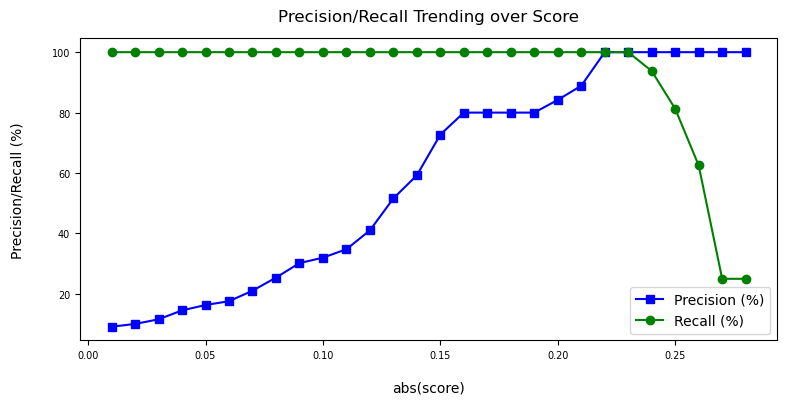

In [13]:
plt.figure(figsize=(9,4),dpi=100,linewidth = 2)
plt.plot(score_datas, precision_datas,'s-',color = 'blue', label="Precision (%)")
plt.plot(score_datas, recall_datas,'o-',color = 'green', label="Recall (%)")
plt.title("Precision/Recall Trending over Score", x=0.5, y=1.03)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("abs(score)", fontsize=10, labelpad = 15)
plt.ylabel("Precision/Recall (%)", fontsize=10, labelpad = 20)
plt.legend(loc = "best", fontsize=10)
plt.show();

## <font color='darkblue'>Credit Card Fraud Detection Data</font>
Let's use another data set for experiment:

In [2]:
import pandas as pd 
df = pd.read_csv('credit_card_data.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [4]:
target_column_name = 'Class'
X = df.loc[:, df.columns!=target_column_name]
X = X.loc[:, X.columns!='Time']
Y = df.loc[:, df.columns==target_column_name]

In [7]:
cc_model = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1), max_features=1.0)
%time cc_model.fit(X)

Wall time: 5.86 s


IsolationForest(contamination=0.1, n_estimators=50)

In [8]:
scores = cc_model.decision_function(X)
anomaly = cc_model.predict(X)
X['scores'] = scores
X['anomaly'] = anomaly

In [9]:
Y_anomaly = Y[X['anomaly'] == -1]
X_anomaly = X[X['anomaly'] == -1]

In [10]:
num_of_fraud = len(Y[Y['Class'] == 1])
num_of_normal = len(Y[Y['Class'] == 0])
Y_anomaly_fraud = Y_anomaly[Y['Class'] == 1]
Y_anomaly_normal = Y_anomaly[Y['Class'] == 0]
print("From anomaly: {:,d}/{:,d} ({:.01f}%) row as fraud; {:,d}/{:,d} ({:.01f}%) row as normal".format(
        len(Y_anomaly_fraud), num_of_fraud,  len(Y_anomaly_fraud)*100/num_of_fraud, 
        len(Y_anomaly_normal), num_of_normal, len(Y_anomaly_normal)*100/num_of_normal
    )
)

From anomaly: 431/492 (87.6%) row as fraud; 5,305/56,863 (9.3%) row as normal


c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [15]:
X_anomaly_scores = X_anomaly[['scores']].abs()
X_anomaly_fraud_scores = X_anomaly[Y_anomaly['Class']==1][['scores']].abs()

In [17]:
X_anomaly_score_list = X_anomaly_scores['scores'].tolist()
X_anomaly_fraud_score_list = X_anomaly_fraud_scores['scores'].tolist()

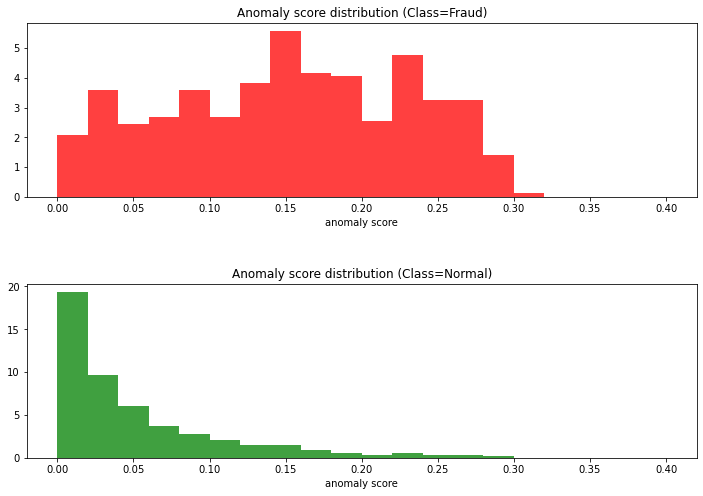

In [33]:
# http://localhost/jforum/posts/list/4425.page#4566
plt.rcParams['figure.figsize'] = [12, 8]

plt.subplot(2, 1, 1) 
plt.title('Anomaly score distribution (Class=Fraud)')
plt.hist(X_anomaly_fraud_score_list, 20, range=(0, 0.4), density=True, facecolor='r', alpha=0.75)
plt.xlabel('anomaly score')

plt.subplot(2, 1, 2)
plt.title('Anomaly score distribution (Class=Normal)')
plt.hist(X_anomaly_score_list, 20, range=(0, 0.4), density=True, facecolor='g', alpha=0.75)
plt.xlabel('anomaly score')

plt.subplots_adjust(hspace = 0.5)  # <-- Increase the space between sub plot  
plt.show()

## <font color='darkblue'>End Notes</font>
In this tutorial we learned what anomalies are, and how the Isolation Forest algorithm can be used to detect them. We also discussed various exploratory data analysis graphs like violin plot and box plot for this problem.

Finally we implemented the Isolation Forest Algorithm and printed the real outliers in the data. Happy Learning!

<a id='sect5'></a>
## <font color='darkblue'>Supplement</font>
* [Medium - Outlier Detection with Isolation Forest](https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e)
> During a recent project, I was working on a clustering problem with data collected from users of a mobile app. The goal was to classify the users in terms of their behavior, potentially with the use of K-means clustering. However, after inspecting the data it turned out that some users represented abnormal behavior — they were outliers.
* [Kaggle - Anomaly Detection Isolation Forest&Visualization](https://www.kaggle.com/adithya44/anomaly-detection-isolation-forest-visualization)